In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [19]:
df = pd.read_csv('Bus100/150218073/1502180732016-07-06.csv',names=['Id','lat','long','date','time'])

In [20]:
df.head()

,Id,lat,long,date,time
0,150218073,12.924964,77.592186,2016-07-06,13:58:33
1,150218073,12.925037,77.592216,2016-07-06,13:59:26
2,150218073,12.925052,77.592216,2016-07-06,13:59:36
3,150218073,12.925054,77.592209,2016-07-06,13:59:46
4,150218073,12.925053,77.592209,2016-07-06,13:59:56


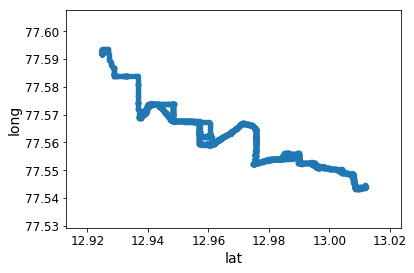

In [21]:
X = np.c_[df['lat']]
Y = np.c_[df['long']]
df.plot(kind='scatter',x='lat',y='long')
plt.show()

In [27]:
import math

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

In [36]:
df.iloc[0].iloc[1]

12.941108999999999

In [37]:
df.iloc[0].iloc[2]

77.573799

In [109]:
for()

5499

In [98]:
d = pd.DataFrame()
d['id'] = [df.iloc[0].iloc[0]]

In [118]:
def makefile(df,d):
    length = len(df['Id'])
    from datetime import datetime
    dist = 0;
    k = 5;
    for i in range(length-1):
        org = df.iloc[i].iloc[1],df.iloc[i].iloc[2]
        des = df.iloc[i+1].iloc[1],df.iloc[i+1].iloc[2]
        di = distance(org,des)
        dist = dist+di
        if(dist>k):
            s1 = df.iloc[0].iloc[4]
            s2 = df.iloc[i+1].iloc[4]
            FMT = '%H:%M:%S'
            tdelta = datetime.strptime(s2, FMT) - datetime.strptime(s1, FMT)
            d['{} KM'.format(k)] = [tdelta]
            k = k+5
    return d

In [171]:
x = 5
lis =['Id']
lis.extend([str('{} KM'.format(x)) for x in range(5,250,5)])
lis

['Id',
 '5 KM',
 '10 KM',
 '15 KM',
 '20 KM',
 '25 KM',
 '30 KM',
 '35 KM',
 '40 KM',
 '45 KM',
 '50 KM',
 '55 KM',
 '60 KM',
 '65 KM',
 '70 KM',
 '75 KM',
 '80 KM',
 '85 KM',
 '90 KM',
 '95 KM',
 '100 KM',
 '105 KM',
 '110 KM',
 '115 KM',
 '120 KM',
 '125 KM',
 '130 KM',
 '135 KM',
 '140 KM',
 '145 KM',
 '150 KM',
 '155 KM',
 '160 KM',
 '165 KM',
 '170 KM',
 '175 KM',
 '180 KM',
 '185 KM',
 '190 KM',
 '195 KM',
 '200 KM',
 '205 KM',
 '210 KM',
 '215 KM',
 '220 KM',
 '225 KM',
 '230 KM',
 '235 KM',
 '240 KM',
 '245 KM']

In [172]:
df_ss = pd.read_csv('sample_submission.csv')
l = list(df_ss.Id)

In [173]:
import os
d_ = pd.DataFrame(columns = lis)
for i in l:
    p= os.listdir('Bus100/{}'.format(i))
    j = 0;
    for j in p:
        d = pd.DataFrame()
        df = pd.read_csv('Bus100/{}/'.format(i)+j,names=['Id','lat','long','date','time'])
        d['Id'] = [df.iloc[0].iloc[0]]
        d = makefile(df,d)
        d_ = d_.append(d,ignore_index=True,sort=False)

In [174]:
d_.head()

,Id,5 KM,10 KM,15 KM,20 KM,25 KM,30 KM,35 KM,40 KM,45 KM,...,340 KM,345 KM,350 KM,355 KM,360 KM,365 KM,370 KM,375 KM,380 KM,385 KM
0,150220445,01:35:21,01:49:08,02:19:51,02:47:15,03:11:39,03:43:01,03:55:28,04:24:11,05:00:23,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,150220445,00:48:48,00:59:56,01:10:03,01:22:30,01:40:35,01:52:03,02:13:58,02:26:55,02:47:11,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,150220445,01:37:26,01:53:43,02:17:37,02:44:40,03:11:34,03:51:04,04:01:52,04:28:05,04:56:10,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,150220445,00:15:36,00:26:24,00:35:21,00:42:11,00:49:59,00:59:57,01:11:04,01:20:02,01:32:10,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,150220445,01:28:23,01:44:48,02:08:03,02:32:47,03:07:40,03:48:19,04:03:26,04:30:10,05:11:10,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [176]:
d_.describe()

,5 KM,10 KM,15 KM,20 KM,25 KM,30 KM,35 KM,40 KM,45 KM,50 KM,...,340 KM,345 KM,350 KM,355 KM,360 KM,365 KM,370 KM,375 KM,380 KM,385 KM
count,594,593,593,593,593,593,592,592,592,592,...,8,6,5,5,5,5,5,5,5,2
mean,0 days 00:56:36.703703,0 days 01:11:47.401349,0 days 01:29:48.539629,0 days 01:48:19.534569,0 days 02:06:35.256323,0 days 02:29:02.217537,0 days 02:48:50.266891,0 days 03:11:35.005067,0 days 03:34:54.548986,0 days 03:56:31.277027,...,0 days 15:57:02.625000,0 days 15:53:17,0 days 15:53:23.400000,0 days 15:57:49.200000,0 days 16:03:44,0 days 16:12:02,0 days 16:24:55,0 days 16:38:21.800000,0 days 16:53:02.200000,0 days 16:49:43.500000
std,0 days 01:18:15.854525,0 days 01:19:53.695025,0 days 01:21:49.295682,0 days 01:22:53.780394,0 days 01:25:18.231518,0 days 01:34:28.279078,0 days 01:28:59.441535,0 days 01:34:30.457821,0 days 01:38:18.541419,0 days 01:41:04.870477,...,0 days 00:25:58.196204,0 days 00:18:19.113278,0 days 00:17:00.388553,0 days 00:17:02.880833,0 days 00:17:52.393351,0 days 00:17:44.172918,0 days 00:19:55.601104,0 days 00:18:31.506725,0 days 00:19:10.970546,0 days 00:04:46.378246
min,0 days 00:06:38,0 days 00:13:58,0 days 00:22:06,0 days 00:31:33,0 days 00:40:20,0 days 00:47:30,0 days 00:51:30,0 days 00:55:29,0 days 01:02:27,0 days 01:38:19,...,0 days 15:28:00,0 days 15:34:39,0 days 15:38:48,0 days 15:42:57,0 days 15:47:46,0 days 15:55:32,0 days 16:04:41,0 days 16:19:47,0 days 16:32:54,0 days 16:46:21
25%,0 days 00:14:39.250000,0 days 00:29:15,0 days 00:44:19,0 days 01:00:50,0 days 01:15:39,0 days 01:33:39,0 days 01:52:06,0 days 02:12:58,0 days 02:34:02.500000,0 days 02:50:32,...,0 days 15:32:37.250000,0 days 15:36:45.250000,0 days 15:39:12,0 days 15:43:40,0 days 15:49:59,0 days 15:59:28,0 days 16:12:36,0 days 16:25:52,0 days 16:39:49,0 days 16:48:02.250000
50%,0 days 00:32:44,0 days 00:48:45,0 days 01:09:37,0 days 01:27:20,0 days 01:47:22,0 days 02:10:19,0 days 02:32:44,0 days 02:52:35.500000,0 days 03:13:59.500000,0 days 03:37:42.500000,...,0 days 16:00:03,0 days 15:51:39.500000,0 days 15:46:27,0 days 15:51:01,0 days 15:55:40,0 days 16:03:58,0 days 16:15:34,0 days 16:30:30,0 days 16:46:26,0 days 16:49:43.500000
75%,0 days 01:13:23.750000,0 days 01:29:17,0 days 01:49:05,0 days 02:11:52,0 days 02:31:55,0 days 02:57:46,0 days 03:20:51.500000,0 days 03:48:52.750000,0 days 04:15:10.250000,0 days 04:36:22.750000,...,0 days 16:09:23.750000,0 days 16:09:25.500000,0 days 16:05:56,0 days 16:10:35,0 days 16:17:23,0 days 16:24:32,0 days 16:40:18,0 days 16:52:46,0 days 17:08:02,0 days 16:51:24.750000
max,0 days 12:17:52,0 days 12:39:57,0 days 12:50:54,0 days 13:03:31,0 days 13:40:14,0 days 17:05:04,0 days 14:00:29,0 days 14:08:47,0 days 14:18:45,0 days 14:30:43,...,0 days 16:42:53,0 days 16:14:36,0 days 16:16:34,0 days 16:20:53,0 days 16:27:52,0 days 16:36:40,0 days 16:51:26,0 days 17:02:54,0 days 17:18:00,0 days 16:53:06


In [2]:
df = pd.read_csv('TrainDataset.pkl')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte